In [25]:
%run evaltools.ipynb

Populating the interactive namespace from numpy and matplotlib
0/2394


In [26]:
sns.set_style("whitegrid")
sns.set_context("talk")
# sns.set_context("paper")

In [27]:
datapath
df = read_data(datapath)

# this is going to remove unwanted data from the dataset

# df = select_df(df, older_than="2017-10-03 23:00", note="mix 2 cylinder surface + sphere error", remove=True, print_log=True)
df = select_df(df, older_than="2017-10-05 12:00", note_contains="mix 2", remove=True, print_log=True)
df = select_df(df, older_than="2017-10-05 17:00", note_contains="mix 4", remove=True, print_log=True)

1997/2394
1997/1997


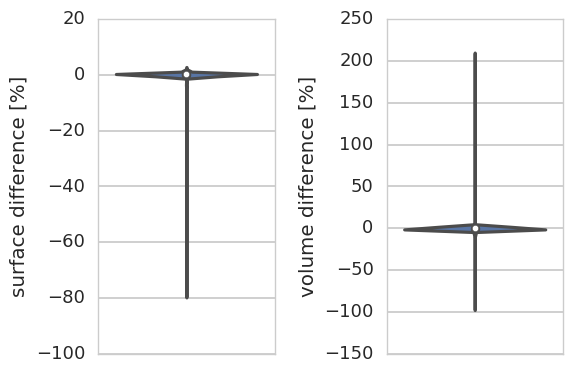

In [28]:
df_error = show_violin_separated(df)

In [29]:
list_filter(df.keys(), contain="note")

['config output note']

# Wilcox a Spearman 


docela dobře vychází třeba experiment `mix 4 cylinder surface ` a  `mix 4 cylinder volume`

Nově se testuje velikost erroru, což je absolutní hodnota z difference. Pomocí Mann–Whitney–Wilcoxon (Wilcoxon rank-sum test) ověřujeme, že je medián erroru menší než 0.001.

In [30]:
maximal_error = 0.001
data = {
    "config output note": [],
    "wilcoxon volume": [],
    "spearman volume": [],
    "wilcoxon surface" : [],
    "spearman surface" : [],
    "mannwhitneyu volume": [],
    "mannwhitneyu surface": [],
    "number of samples": [],
    "surface mean err": [],
    "volume mean err": []
}
for note in np.unique(df["config output note"]):
    dfs = df[df["config output note"] == note]
    vw, vs, sw, ss = statistic_tests(dfs)
    data["config output note"].append(note)
    data["wilcoxon volume"].append(vw.pvalue)
    data["spearman volume"].append(vs.pvalue)
    data["wilcoxon surface"].append(sw.pvalue)
    data["spearman surface"].append(ss.pvalue)
    data["number of samples"].append(len(dfs))
    if len(dfs) > 3:
        serr = np.abs((dfs["surface [mm^2]"] - dfs["numeric surface [mm^2]"]) / dfs["surface [mm^2]"] )
        verr = np.abs((dfs["volume [mm^3]"] - dfs["numeric volume [mm^3]"]) / dfs["volume [mm^3]"] )
        surf_sh = scipy.stats.mannwhitneyu(serr, np.ones_like(serr)*maximal_error, alternative="less")[1]
        vol_sh = scipy.stats.mannwhitneyu(verr, np.ones_like(verr)*maximal_error, alternative="less")[1]
#         surf_sh = np.mean(err)
#         surf_sh = scipy.stats.shapiro(dfs["surface [mm^2]"] - dfs["numeric surface [mm^2]"])
    else:
        surf_sh = NaN
        vol_sh = NaN
        serr = NaN
        verr = NaN
    data["mannwhitneyu surface"].append(surf_sh)
    data["mannwhitneyu volume"].append(vol_sh)
    data["surface mean err"].append(np.mean(serr))
    data["volume mean err"].append(np.mean(verr))
    
#     show_error(dfs, radius_method=note)
pd.set_option("display.max_rows",101)
pd.DataFrame(data)

,config output note,mannwhitneyu surface,mannwhitneyu volume,number of samples,spearman surface,spearman volume,surface mean err,volume mean err,wilcoxon surface,wilcoxon volume
0,element number cylinder volume + sphere error,9.980039e-01,3.059528e-18,91,1.134014e-10,1.134014e-10,0.004385,0.000614,1.057584e-16,2.675441e-16
1,element number inscribed,1.000000e+00,1.000000e+00,91,1.134014e-10,1.134014e-10,0.008141,0.018099,1.057584e-16,1.057584e-16
2,generated volume element_number anisotropic in...,1.000000e+00,1.000000e+00,20,0.000000e+00,0.000000e+00,0.001734,0.005635,8.732638e-05,8.732638e-05
3,generated volume isotropy inscribed,1.000000e+00,1.000000e+00,20,0.000000e+00,0.000000e+00,0.001707,0.005611,8.732638e-05,8.732638e-05
4,generated volume length inscribed,1.000000e+00,1.000000e+00,20,0.000000e+00,0.000000e+00,0.002463,0.006225,8.732638e-05,8.732638e-05
5,generated volume noise inscribed,1.000000e+00,1.000000e+00,20,NaN,NaN,0.001734,0.005622,7.744216e-06,7.744216e-06
6,generated volume radius inscribed,1.000000e+00,1.000000e+00,20,0.000000e+00,0.000000e+00,0.002196,0.005946,8.732638e-05,8.732638e-05
7,generated volume resolution_mm inscribed,1.000000e+00,1.000000e+00,20,NaN,NaN,0.001734,0.005622,7.744216e-06,7.744216e-06
8,mix 10 cylinder surface,9.363226e-05,1.000000e+00,27,5.162163e-26,5.162163e-26,0.000593,0.003193,5.606117e-06,5.606117e-06
9,mix 10 cylinder surface + sphere error,7.758394e-01,9.605278e-01,27,2.953924e-22,5.162163e-26,0.002151,0.001393,4.421944e-05,1.301337e-01


## Vybrané experimenty

Následující experimenty vypadají obstojně.  `mix 4` testuje vždy jen jeden objekt. Navíc to má dobrá čísla objemu při kompenzaci povrchu.

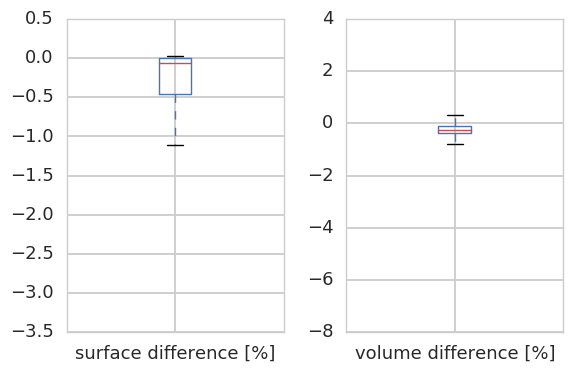

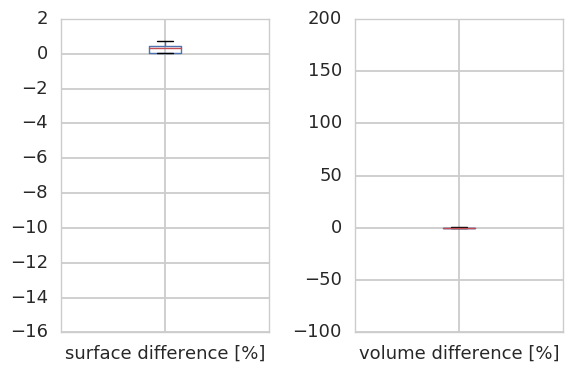

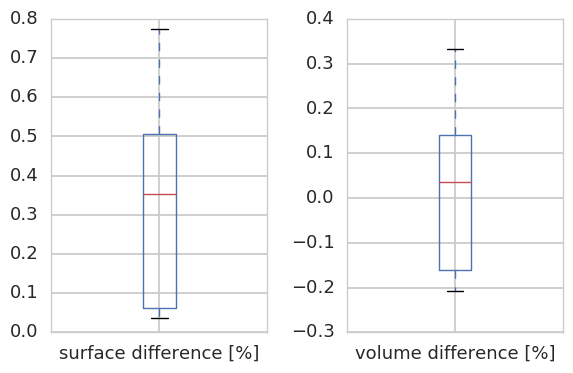

In [47]:

sns.set_style("whitegrid")
sns.set_context("talk")

df_graph = show_box(select_df(df, "mix 2 cylinder surface + sphere error"))
df_graph = show_box(select_df(df, "mix 4 cylinder surface + sphere error"))
df_graph = show_box(select_df(df, "mix 6 cylinder surface + sphere error"))

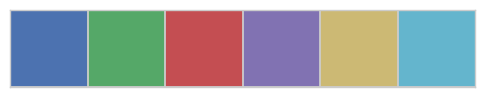

In [32]:

current_palette = sns.color_palette("deep")
sns.palplot(current_palette)
sns.set_palette(current_palette)

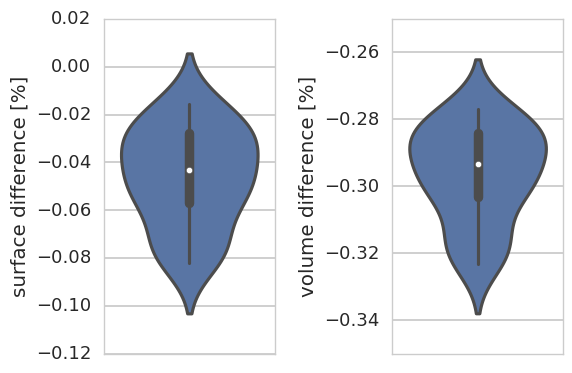

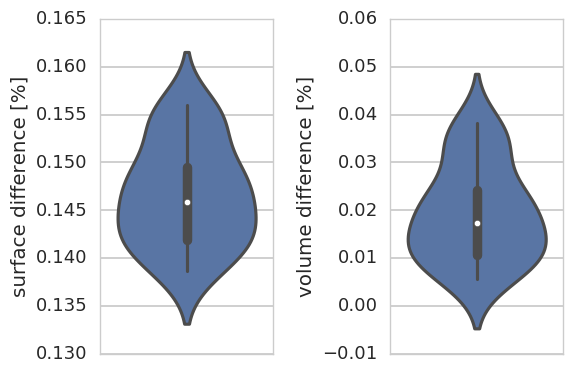

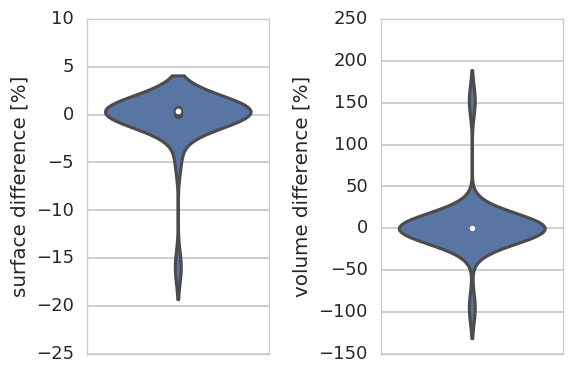

In [33]:

df_graph = show_violin_separated(select_df(df, "mix 4 cylinder surface"))
plt.figure()
df_graph = show_violin_separated(select_df(df, "mix 4 cylinder volume"))
plt.figure()
df_graph = show_violin_separated(select_df(df, "mix 4 cylinder surface + sphere error"))

# Object number

56/77
0/0
0/0
0/0
57/77
0/0
0/0
0/0
0/0
0/0
0/0
0/0


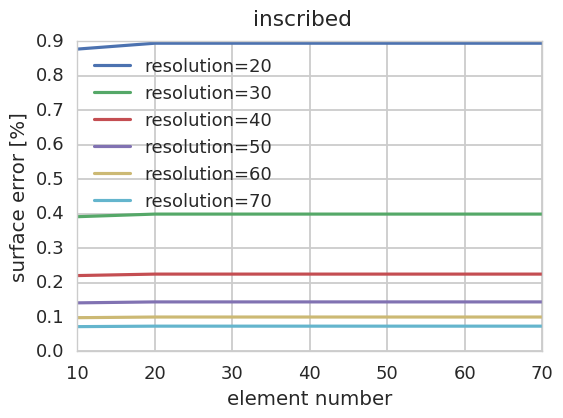

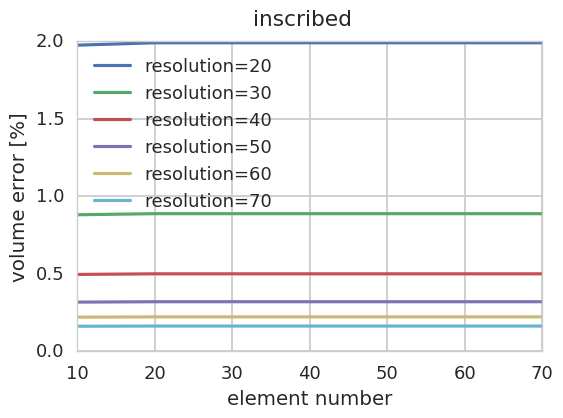

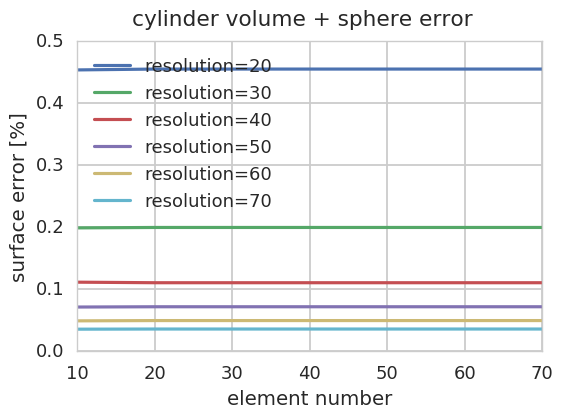

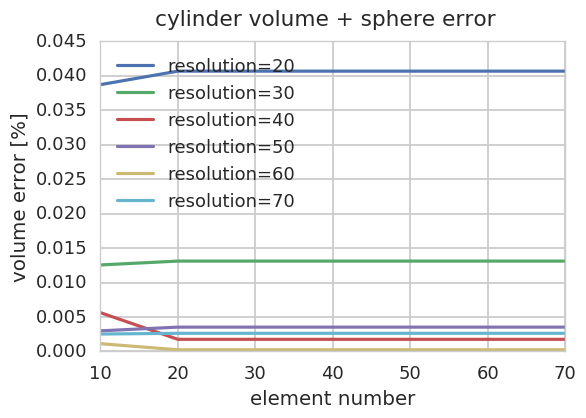

In [49]:
dpi = 400
date = "2017-10-05 21:00"
for radius_method in available_radius_methods:
    dfs = df[
        df[note_key] == "element number " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    dfs = dfs[dfs["measurement resolution"] > 10]
    l1 = len(dfs)
    dfs = newer_data(dfs, date)
    print("{}/{}".format(len(dfs), l1))
    if len(dfs) < 1:
        continue

    # surface
    ykey="surface error [mm^2]"
    ykey="surface error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")
    sns.set_context("talk")
    fig, ax = plt.subplots(
#         figsize=(5,3)
    )
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        #dfi.plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    plt.suptitle(radius_method)
    fn = "element_number_surface_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=dpi)
    
    # volume
    ykey="volume error [mm^3]"
    ykey="volume error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(
#         figsize=(5,3)
    )
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    plt.suptitle(radius_method)
    fn = "element_number_volume_" + radius_method 
    plt.savefig(fn + ".pdf", bbox_inches='tight')
    plt.savefig(fn + ".png", bbox_inches='tight', dpi=dpi)

In [35]:
dfs["volume error [%]"]

Series([], Name: volume error [%], dtype: float64)

In [36]:
# df

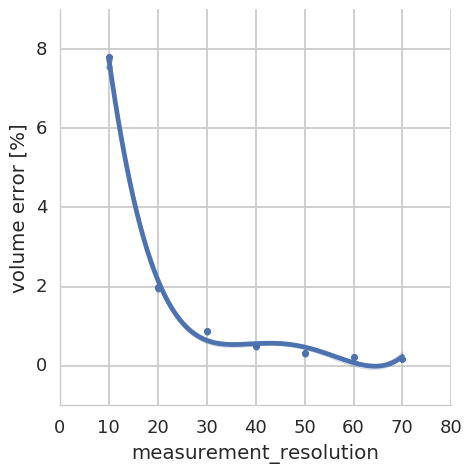

In [37]:
radius_method = "inscribed"
dfs = df[
    df[note_key] == "element number " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
k1 = "volume error [%]"
k2 = "measurement_resolution"

k2 in dfs.keys()
sns.lmplot(y=k1, x=k2, data=dfs, order=4, 
           truncate=True
           
#            logx=True
          )

# Error and measurement resolution

182/182


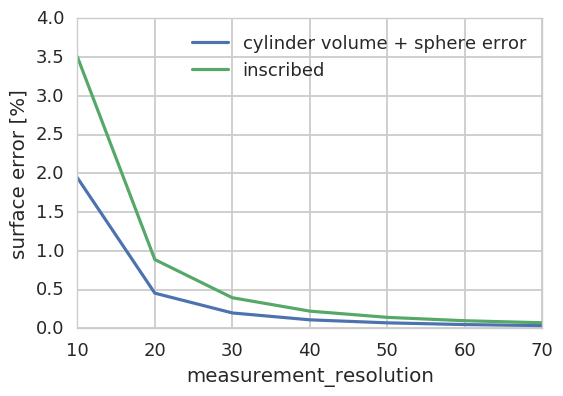

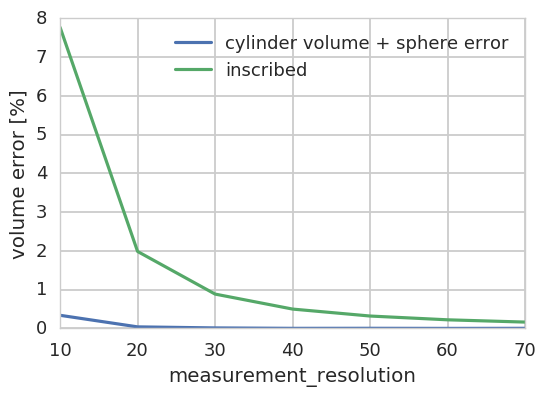

In [38]:
# zip(list(dfs_group))

# for radius_method in available_radius_methods:
radius_method = "inscribed"
dfs = df[
    df[note_key] == "element number " + radius_method
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfs = select_df(df, note_contains="element number ")
l1 = len(dfs)
dfs = newer_data(dfs, date)
print("{}/{}".format(len(dfs), l1))
if len(dfs) < 1:
    print "blbe"
#     continue
xkey="measurement_resolution"
ykey="surface error [%]"
# .plot(x="element_number")
sns.set_context("talk")

dfs_group = dfs[[ykey, xkey, note_key]].sort_values(by=xkey).groupby(by=note_key)
fig, ax = plt.subplots(
#         figsize=(5,3)
)
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
for label, dfi in dfs_group:
    dfi.groupby(by=xkey).mean().abs().reset_index().plot(x=xkey, y=ykey, ax=ax, label="{}".format(label[15:]))
plt.ylabel(ykey)
plt.xlabel(xkey)
# dfs_group.plot(x=xkey, y=ykey)
xkey="measurement_resolution"
ykey="volume error [%]"
# .plot(x="element_number")
sns.set_context("talk")

dfs_group = dfs[[ykey, xkey, note_key]].sort_values(by=xkey).groupby(by=note_key)
fig, ax = plt.subplots(
#         figsize=(5,3)
)
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
for label, dfi in dfs_group:
    dfi.groupby(by=xkey).mean().abs().reset_index().plot(x=xkey, y=ykey, ax=ax, label="{}".format(label[15:]))
plt.ylabel(ykey)
plt.xlabel(xkey)

In [39]:
# dfi.groupby(by="measurement_resolution").mean().abs().reset_index().plot(x=xkey, y=ykey, ax=ax, label="resolution={}".format(label))
# dfi

In [40]:

# dfs_group = dfs[["surface error [%]", "measurement_resolution" ]].sort_values(by="measurement_resolution")#.groupby(by="surface error")
# dfs_group
# label
# dfi

# Porosity

http://home.zcu.cz/~mjirik/lisa/teigen/teigen_porosity_001.zip

# Volume fraction data

In [41]:
dfs = df[
    df[note_key] == "volume fraction overlap inscribed"
]
# np.unique(df[note_key])
dfs["numeric volume [mm^3]"]
print(list_filter(dfs.keys(), contain="area"))

# print(list_filter(dfs.keys(), contain="frac"))
volume_fraction = dfs["numeric volume [mm^3]"] / dfs["measurement area volume [mm^3]"]
print(volume_fraction)

['config areasampling areasize_mm', 'config areasampling areasize_px', 'config areasampling voxelsize_mm', 'measurement area volume [mm^3]']
3951    0.795136
dtype: float64


## volume fraction 34% 

ke stažení [zde](http://home.zcu.cz/~mjirik/lisa/teigen/teigen_volume_fraction_overlap__001.zip)
Tenhle má cca 1000 objektů a výpočet zabere kolem 5ti hodin. Ještě se snažím vytvořit větší zaplnění. Až se dostanu přes 50% vygeneruju i obrázky.

![fig](http://github.com/mjirik/teigen/blob/master/graphics/teigen_volume_fraction_34.png?raw=true)

# Computation info

In [42]:
id_of_requested_table = 0
dfcinfo = pd.read_html("hardinfo_report.html")[id_of_requested_table]
# df
dfcinfo[(dfcinfo[0] == "Operating System") | (dfcinfo[0] == "Memory") | (dfcinfo[0] == "Processor")]
# memory_str = df[df[0] == "Memory" ].iloc[0][1]
# memory_str[0:memory_str.find(" (")]

,0,1
2,Processor,4x Intel(R) Core(TM) i5-2520M CPU @ 2.50GHz
3,Memory,8129MB (4283MB used)
4,Operating System,Ubuntu 16.04.3 LTS


In [43]:
import imtools
import imtools.dili as dili
dfs = select_df(df, note_contains="generated")
req_keys = list(dili.list_contains(dfs.keys(), "time [s]"))
req_keys.append(note_key)
dfsm = dfs[req_keys].groupby(by=note_key).agg(["min", "max", "mean", "std"])
display(dfsm)



step 1 time [s]  \
                                                               min   
config output note                                                   
generated volume element_number anisotropic ins...       38.067334   
generated volume isotropy inscribed                      80.243249   
generated volume length inscribed                        78.629314   
generated volume noise inscribed                         96.139334   
generated volume radius inscribed                         9.242478   
generated volume resolution_mm inscribed                 96.829405   

                                                                            \
                                                           max        mean   
config output note                                                           
generated volume element_number anisotropic ins...  943.498296  399.942898   
generated volume isotropy inscribed                  93.768053   90.037884   
generated volume length inscribed                    99.982460   87.964211   
generated volume noise inscribed                     97.079383   96.663124   
generated volume radius inscribed                   109.942790   75.716730   
generated volume resolution_mm inscribed            102.029161   97.574106   

                                                                \
                                                           std   
config output note                                               
generated volume element_number anisotropic ins...  301.944696   
generated volume isotropy inscribed                   4.094332   
generated volume length inscribed                     6.884682   
generated volume noise inscribed                      0.285720   
generated volume radius inscribed                    32.566072   
generated volume resolution_mm inscribed              1.538118   

                                                   step 2 time [s]  \
                                                               min   
config output note                                                   
generated volume element_number anisotropic ins...       18.566351   
generated volume isotropy inscribed                      24.964832   
generated volume length inscribed                        13.760947   
generated volume noise inscribed                         92.011967   
generated volume radius inscribed                        27.609752   
generated volume resolution_mm inscribed                  0.289337   

                                                                            \
                                                           max        mean   
config output note                                                           
generated volume element_number anisotropic ins...   77.062346   46.914479   
generated volume isotropy inscribed                 517.954692   63.729704   
generated volume length inscribed                   189.663245   34.923465   
generated volume noise inscribed                    160.093097  154.491107   
generated volume radius inscribed                   277.606368  123.353067   
generated volume resolution_mm inscribed            517.954692   34.890713   

                                                               total time [s]  \
                                                           std            min   
config output note                                                              
generated volume element_number anisotropic ins...   19.266408      56.633685   
generated volume isotropy inscribed                 107.140593     105.208081   
generated volume length inscribed                    41.636544      92.397705   
generated volume noise inscribed                     14.768321     188.151301   
generated volume radius inscribed                    98.997194     123.314850   
generated volume resolution_mm inscribed            118.328807      97.181585   

                                                          

## measurement resolution dependency

step 1 time [s]                                   \
                                     min         max      mean        std   
config output note                                                          
element number inscribed        0.761139  185.648213  59.91961  48.360153   

                         step 2 time [s]                                \
                                     min       max      mean       std   
config output note                                                       
element number inscribed        0.021872  0.509206  0.197092  0.134437   

                         total time [s]                                   
                                    min         max       mean       std  
config output note                                                        
element number inscribed       0.817495  186.053428  60.116702  48.43324

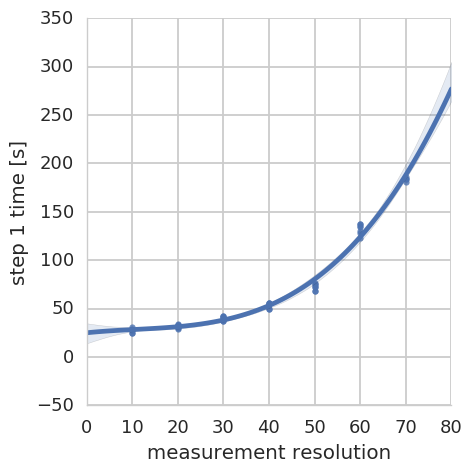

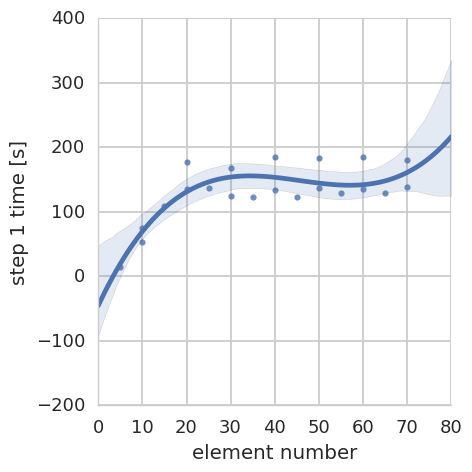

In [44]:
# element number inscribed
dfs = select_df(df, newer_than="2017-10-05", note="element number inscribed")
req_keys = list(dili.list_contains(dfs.keys(), "time [s]"))
req_keys.append(note_key)
dfsm = dfs[req_keys].groupby(by=note_key).agg(["min", "max", "mean", "std"])
display(dfsm)
# display(sns.lmplot(data=dfs, x="element number", y="processing_info step1_total_time_s"))
# display(sns.lmplot(data=dfs[dfs["element number"] == 50], x="measurement_resolution", y="processing_info step1_total_time_s", order=3))
display(sns.lmplot(data=dfs[dfs["element number"] >= 40], x="measurement resolution", y="step 1 time [s]", order=3))
display(sns.lmplot(data=dfs[dfs["measurement resolution"] >= 60], x="element number", y="step 1 time [s]", order=3))
# dili.list_contains(dfs.keys(), "resolution")

# Dataset configuration

In [45]:
%run paper_experiments_params.ipynb
config = get_paper_config()


Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


INFO:teigen.tgmain:Starting Teigen
INFO:teigen.tgmain:Starting Teigen


0/2394
/home/mjirik/projects/teigen
['/home/mjirik/projects/teigen/teigen']


In [46]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(config)

def sprint(structure, indent=):
    for item in structure

SyntaxError: invalid syntax (<ipython-input-46-e82d6fa6550f>, line 5)